In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_csv('dataset/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

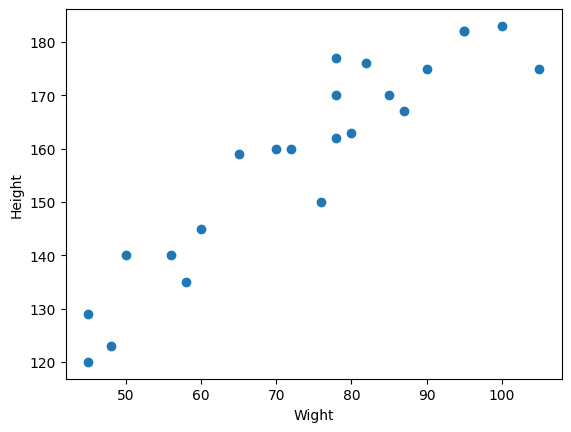

In [51]:
## Scatter plot 
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Wight")
plt.ylabel("Height")

In [52]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [53]:
## seaborn for visualization
import seaborn as sns

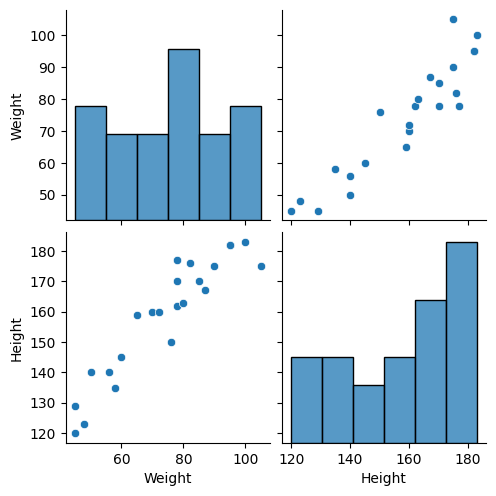

In [54]:
sns.pairplot(df)

In [55]:
## step1 - Independant and Dependant features
X = df[['Weight']] ## independant feature should be a dataframe or a 2d array
y = df['Height'] ## 1d is fine for the dependant feature as only 1 independant feature

In [56]:
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [57]:
np.array(y).shape

(23,)

In [58]:
## Train Test Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
X_train.shape ## 17 rows and 1 fearure

(17, 1)

In [60]:
## Stardardization
from sklearn.preprocessing import StandardScaler


In [61]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)

In [62]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [63]:
## Apply Simple LR
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression(n_jobs=-1) ## create the model

In [ ]:
regression.fit(X_train, y_train) ## teach the model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [70]:
print("Coefficient of slope:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient of slope: [17.2982057]
Intercept: 156.47058823529412


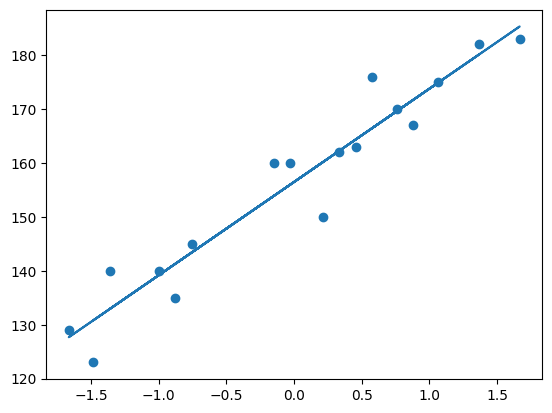

In [73]:
# plot training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

## Prediction of test data
1. predicted height output = intecept + coeft_(Weights)
2. y_pred_test = 156.47058823529412 + 17.2982057(X_test)

In [76]:
## prediction for the test data
y_pred = regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [77]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [81]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [82]:
# R square
from sklearn.metrics import r2_score

In [85]:
score = r2_score(y_test, y_pred)
score

0.7360826717981276

In [93]:
## Adjusted R Square
Adj_r_Squr = 1 - (1 - score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
Adj_r_Squr

0.6701033397476595

In [96]:
## OLS LR
import statsmodels.api as sm

In [99]:
model = sm.OLS(y_train, X_train).fit()

In [101]:
prediction = model.predict(X_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [103]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 11 Dec 2025   Prob (F-statistic):                       0.664
Time:                        11:27:05   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## prediction for the new data
regression.predict(scaler.transform([[72]])) # Weight is 72kgs

d:\LRPracticle\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])